<a href="https://colab.research.google.com/github/PerdomoVergaraFernando/Investigaciones-de-operaciones-/blob/main/Diferencias_progresivas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tabla con h=0.1 y k=0.0005:
 |   x_i |   u(x_i, 0.5) (Exacta) |   w_{i,N} (Numérica) |   |u(x_i, 0.5) - w_{i,N}| |
|------:|-----------------------:|---------------------:|--------------------------:|
|   0   |            0           |           0          |               0           |
|   0.1 |            0.00222241  |           0.00228652 |               6.41066e-05 |
|   0.2 |            0.00422728  |           0.00434922 |               0.000121938 |
|   0.3 |            0.00581836  |           0.00598619 |               0.000167833 |
|   0.4 |            0.00683989  |           0.00703719 |               0.0001973   |
|   0.5 |            0.00719188  |           0.00739934 |               0.000207453 |
|   0.6 |            0.00683989  |           0.00703719 |               0.0001973   |
|   0.7 |            0.00581836  |           0.00598619 |               0.000167833 |
|   0.8 |            0.00422728  |           0.00434922 |               0.000121938 |
|   0.9 |            0.00

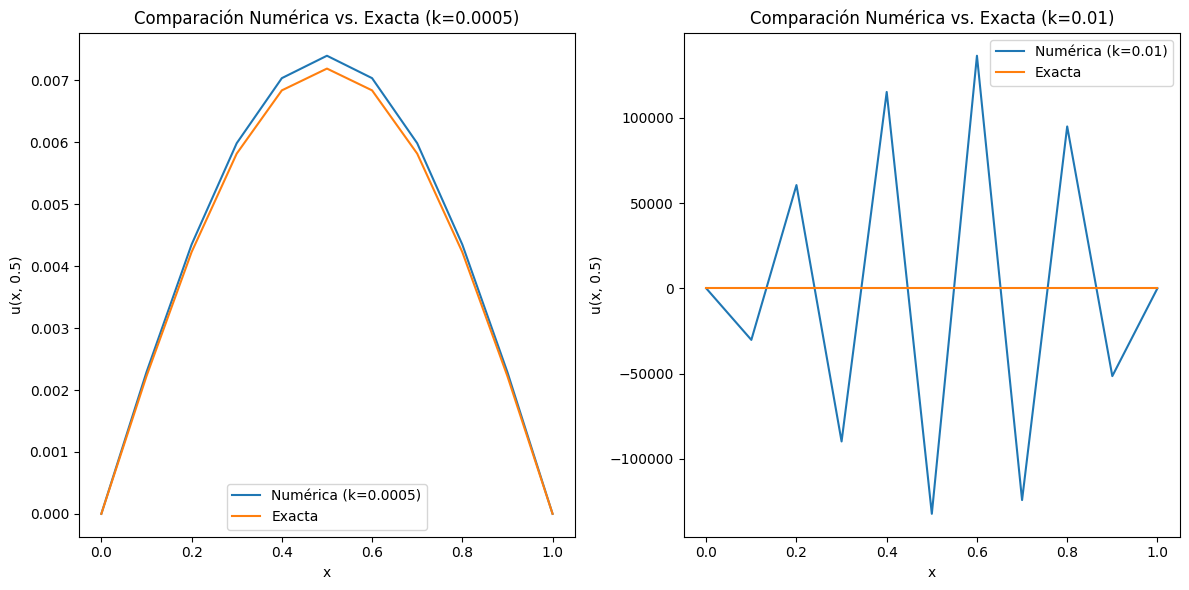


Comentario sobre las diferencias:
Con h=0.1 y k=0.0005, la solución numérica se parece más a la solución exacta.
Pero al aumentar k a 0.01, la solución numérica se vuelve inestable y no se parece a la solución exacta.
Esto pasa porque el método de diferencias finitas progresivas necesita que k/h^2 sea pequeño para que la solución sea estable.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate


# Primero, definimos los parámetros del problema
L = 1      # Longitud del dominio
T = 0.5    # Tiempo final


# Definimos la solución exacta para comparar
def u_exacta(x, t):
  return np.exp(-np.pi**2 * t) * np.sin(np.pi * x)


# Ahora, la función principal para resolver la ecuación del calor usando diferencias finitas
def solucion_ecuacion_calor(L, T, h, k):
  # Calculamos el número de puntos en espacio y tiempo
  M = int(L / h) + 1
  N = int(T / k) + 1

  # Creamos los arrays para el espacio y el tiempo
  x = np.linspace(0, L, M)
  t = np.linspace(0, T, N)

  # Inicializamos la matriz para la solución
  U = np.zeros((N, M))

  # Aplicamos la condición inicial
  U[0, :] = np.sin(np.pi * x)

  # Aplicamos las condiciones de frontera
  U[:, 0] = 0
  U[:, -1] = 0

  # Calculamos el coeficiente r
  r = k / h**2

  # Iteramos en el tiempo y el espacio para calcular la solución
  for j in range(0, N - 1):
    for i in range(1, M - 1):
      U[j + 1, i] = U[j, i] + r * (U[j, i + 1] - 2 * U[j, i] + U[j, i - 1])

  return x, t, U


# Función para generar la tabla de comparación
def generar_tabla_comparacion(x, u_num, u_exacta):
  # Calculamos las diferencias absolutas
  diferencias = np.abs(u_exacta - u_num)

  # Preparamos los datos para la tabla
  tabla_datos = []
  for i in range(len(x)):
    tabla_datos.append([x[i], u_exacta[i], u_num[i], diferencias[i]])

  # Definimos el encabezado de la tabla
  encabezado = ["x_i", "u(x_i, 0.5) (Exacta)", "w_{i,N} (Numérica)", "|u(x_i, 0.5) - w_{i,N}|"]

  # Generamos la tabla en formato Markdown
  tabla = tabulate(tabla_datos, headers=encabezado, tablefmt="pipe")

  return tabla


# Definimos los tamaños de paso
h1 = 0.1
k1 = 0.0005


h2 = 0.1
k2 = 0.01


# Calculamos las soluciones numéricas
x1, t1, U1 = solucion_ecuacion_calor(L, T, h1, k1)
x2, t2, U2 = solucion_ecuacion_calor(L, T, h2, k2)


# Evaluamos la solución exacta en t=0.5
u_exacta_t1 = u_exacta(x1, T)
u_exacta_t2 = u_exacta(x2, T)


# Generamos las tablas de comparación
tabla1 = generar_tabla_comparacion(x1, U1[-1, :], u_exacta_t1)
tabla2 = generar_tabla_comparacion(x2, U2[-1, :], u_exacta_t2)


# Imprimimos las tablas
print("Tabla con h=0.1 y k=0.0005:\n", tabla1)
print("\nTabla con h=0.1 y k=0.01:\n", tabla2)


# Graficamos las soluciones
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(x1, U1[-1, :], label='Numérica (k=0.0005)')
plt.plot(x1, u_exacta_t1, label='Exacta')
plt.xlabel('x')
plt.ylabel('u(x, 0.5)')
plt.title('Comparación Numérica vs. Exacta (k=0.0005)')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(x2, U2[-1, :], label='Numérica (k=0.01)')
plt.plot(x2, u_exacta_t2, label='Exacta')
plt.xlabel('x')
plt.ylabel('u(x, 0.5)')
plt.title('Comparación Numérica vs. Exacta (k=0.01)')
plt.legend()


plt.tight_layout()
plt.show()


# Comentario sobre las diferencias
print("\nComentario sobre las diferencias:")
print("Con h=0.1 y k=0.0005, la solución numérica se parece más a la solución exacta.")
print("Pero al aumentar k a 0.01, la solución numérica se vuelve inestable y no se parece a la solución exacta.")
print("Esto pasa porque el método de diferencias finitas progresivas necesita que k/h^2 sea pequeño para que la solución sea estable.")